# <font color="red">**LIBRARIES**</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from statsmodels.stats import power
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import levene
from statsmodels.formula.api import ols
table = sm.stats.anova_lm(test, typ = 2)
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# <font color="red">**HYPOTHESIS TESTING**</font>
<font color="orange">**1) Numerical Vs Categorical**</font>
  * 2 Sample (T-Test)
  * Greater than 2 Sample (ANOVA)

<font color="orange">**2) Categorical Vs Categorical**</font>
  * Chi Square Test

<font color="orange">**3) Numericall Vs Numerical**</font>
  * Correlation Test



---



---


# <font color="red">**1) Z-TEST**</font>

**Note:**
* Example: Shampoo bottles - Firm A
* n >= 30
* Population mean & Population std should be finite
* Distribution: Normal

## <font color="orange">**1.1) Z-Test - One Sample**</font>



In [ ]:
# Given Data:
'''
pop_mean (mu)
pop_std
sample_mean (m)
n (Sample size)
SE = pop_mean/np.sqrt(n)
'''

In [ ]:
# Assumption:
'''
Ho: mu = 1800
Ha: mu < 1800 --> LEFT TAILED
Ha: mu > 1800 --> RIGHT TAILED
Ha: mu <> 1800 --> TWO TAILED

DISTRIBUTION: Normal
'''

### 1.1.1) P-Value

In [ ]:
# Calculate Z-Stastistics:
z_score = (sample_mean - pop_mean) / SE

# Calculate P-Value:
from scipy.stats import norm
p_value = norm.cdf(z_score) # LEFT TAILED
p_value = 1 - norm.cdf(z_score) # RIGHT TAILED
p_value = 2 * (1 - norm.cdf(abs(z_score))) # TWO TAILED

# Conclusion:
if p_value < alpha:
  print("Reject Ho")
else:
  print("Failed to Reject Ho")

### 1.1.2) Z-Critical or T-Critical

In [ ]:
# Calculate Z-Critical:
# ONE TAILED TEST
z_critical = norm.ppf(1-alpha)
z_critical = norm.isf(q=alpha)
# TWO TAILED TEST
z_critical = np.abs(norm.ppf(1-(alpha/2)))
z_critical = np.abs(norm.isf(q=alpha/2))

# Conclusion:
if z_critical < z_score:
  print("Reject Ho")
else:
  print("Failed to Reject Ho")

### 1.1.3) X-Critical

In [ ]:
# Calculate Z-Critical:
# ONE TAILED TEST
z_critical = norm.ppf(1-alpha)
z_critical = norm.isf(q=alpha)
# TWO TAILED TEST
z_critical = np.abs(norm.ppf(1-(alpha/2)))
z_critical = np.abs(norm.isf(q=alpha/2))

# Calculate X-Critical:
x_critical = (z_critical * SE) + pop_mean

# Conclusion:
if x_critical < sample_mean:
  print("Reject Ho")
else:
  print("Failed to Reject Ho")

### 1.1.4) Confidence Interrval

In [ ]:
# Calculate Z-Critical:
# ONE TAILED TEST
z_critical = norm.ppf(1-alpha)
z_critical = norm.isf(q=alpha)
# TWO TAILED TEST
z_critical = np.abs(norm.ppf(1-(alpha/2)))
z_critical = np.abs(norm.isf(q=alpha/2))

# Calculate Confidence Interval:
margin_of_error = z_critical * SE
confidence_interval = (sample_mean - Margin_of_error, sample_mean + Margin_of_error)

# Conclusion:
if confidence_interval[0] <= pop_mean <= confidence_interval[1]:
  print("Failed to Reject Ho")
else:
  print("Reject Ho")

### 1.1.5) Powet of Test</font>

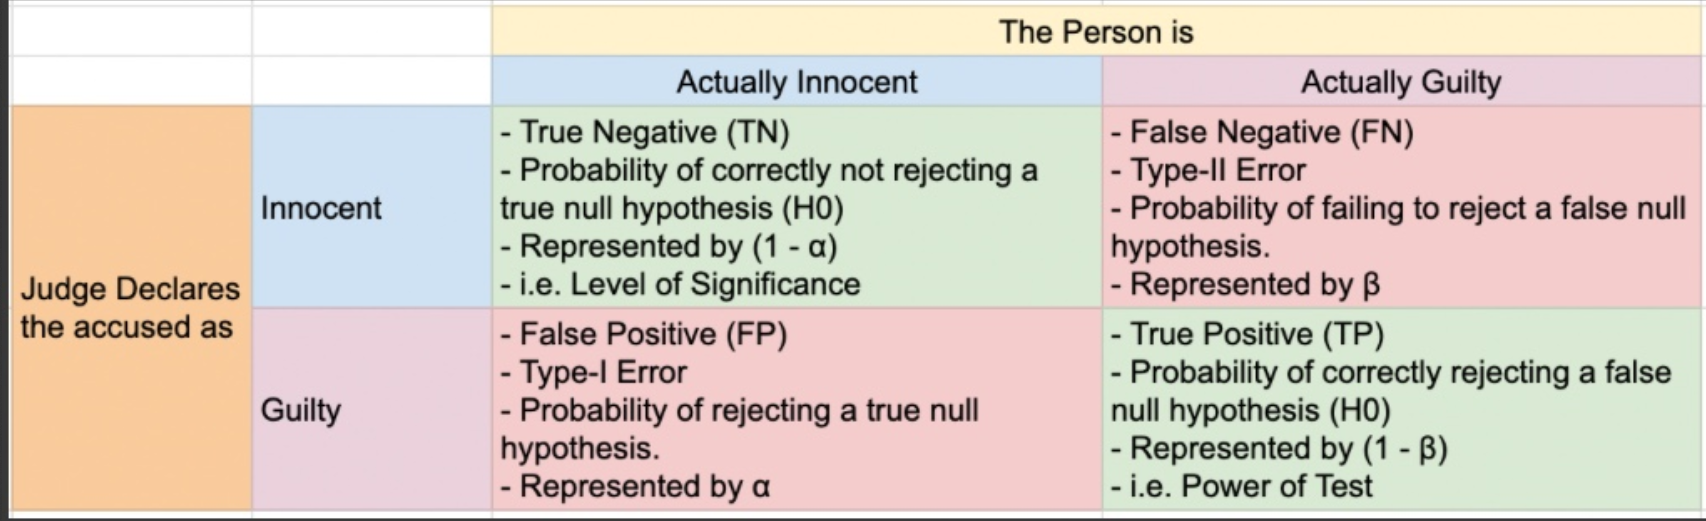

**Note:**

* When conducting hypothesis tests, we often focus on controlling **Type I error (α)**, , which is the probability of rejecting a true  null hypothesis.

* However, it is equally important to consider **Type II error (β)**
, which is the probability of failing to reject a false null hypothesis.

* **Power (often represented as 1 - β)** is the probability of correctly rejecting a false null hypothesis.

**Factors infulencing Power:**

* Sample Size (n) increases, boost the power.
* Significance level (α) low, Minimizes the Type I error.
* Variablity (sigma) low, increases the power of test(1 - β).
* **Effect size: (or) Cohen's d**:
  * `d = (Sample Mean − Population Mean)/Sample Standard Deviation`



Example Problem: Chocolate factory:

In [ ]:
# Assuumption:
'''
Ho: μ=50 grams
Ha: μ<>50 grams
Ha: μ>50 grams (RIGHT TAILED)
Ha: μ<50 grams (LEFT TAILED)
'''
# Calculate the z-critical value:
# ONE TAILED TEST
z_critical = norm.ppf(1-alpha)
z_critical = norm.isf(q=alpha)
# TWO TAILED TEST
z_critical = norm.ppf(1-(alpha/2))

# Calculate the sample mean (average weight of the chocolate bars)
data = [55, 45, 52, 48, 55, 52, 52, 53, 48, 52, 53, 47, 54, 51, 52, 51, 48, 52, 53, 54, 51, 51, 52, 54, 47, 52, 53, 48, 51, 54]
samp_mean = np.mean(data)
samp_std = np.std(data)

# Calculate the effect size (difference between sample mean and hypothesized mean)
effect_size = (samp_mean - hypo_mean) / samp_std

from statsmodels.stats import power
power = power.zt_ind_solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, ratio=0, alternative='two-sided')

https://rpsychologist.com/d3/nhst/

**CONCLUSION:**

The goal is to minimize both Type 1 and Type 2 errors to ensure effective quality monitoring.

## <font color="orange">**1.2) Z-Test - Two Sample**</font>



**Note:**
* Example: Medicine 1 and Medicine 2
* Distribution: Normal

In [ ]:
# Given Data:
'''
samp_mean_1
samp_mean_2
samp_std_1
samp_std_2
n1 (sample_size_1)
n2 (sample_size_2)
alpha
'''

In [ ]:
# Assumption:
'''
Ho: sample_1_mean = sample_2_mean
Ha: sample_1_mean >, <, <> sample_2_mean

DISTRIBUTION: Normal
'''

### 1.2.1) P-Value:

In [ ]:
# Function to calculate the test statistic:
def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2):
  # Calculate the test statistic
  denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
  z_score = (samp_mean_1 - samp_mean_2) / denominator
  return z_score

# Calculate the z-score using the function
z_score = TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2)

# Calculate P-Value:
p_value = norm.cdf(z_score) # LEFT TAILED
p_value = 1 - norm.cdf(z_score) # RIGHT TAILED
p_value = 2 * (1 - norm.cdf(abs(z_score))) # TWO TAILED

# Conclusion:
if p_value < alpha:
  print("Reject Ho")
else:
  print("Failed to Reject Ho")

### 1.2.2) Given data in the form of lists

In [ ]:
# import a library to perform a Z-test
from scipy import stats
from statsmodels.stats import weightstats as stests
z_score, pval = stests.ztest(x1 = [1,2,3,...],
                             x2 = [1,2,3,...],
                             alternative = 'two-sided')



---


# <font color="red">**2) Z-PROPORRTION TEST**</font>

## <font color="orange">**2.1) Z-Proportion - One Sample Test**</font>



**Note:**
* Example: Proportion of the satisfied customer with the new product(Target satisfaction = p) and sample proportion (p_hat = x/n)
* n >= 30
* Distribution: Normal

In [ ]:
# Given Data:
x # sample_satisfied_customer_size
n # sample_customers_size
p # Target_satisfaction
p_hat = x/n

In [ ]:
# Assumption:
'''
TWO TAILED:
Ho: p = Target_satisfaction
Ha: p <> Target_satisfaction

RIGHT TAILED:
Ho: p <= Target_satisfaction
Ha: p > Target_satisfaction

LEFT TAILED:
Ho: p >= Target_satisfaction
Ha: p < Target_satisfaction

DISTRIBUTION: Normal
'''

P-Value:

Prefered:

In [ ]:
# Calculate the test statistic (Z)
z_st = (p_hat - p) / np.sqrt((p * (1 - p)) / n)

# Calculate p_value:
from scipy.stats import norm
p_value = stats.norm.cdf(z_st) # LEFT TAILED
p_value = 1 - stats.norm.cdf(z_st) # RIGHT TAILED
p_value = 2 * (1- stats.norm.cdf(np.abs(z_st))) # TWO TAILED

# Conclusion:
if p_value < alpha:
  print("Reject Ho")
else:
  print("Failed to Reject Ho")

Library:

Can use it too.

In [ ]:
# Calculate the test statistic (Z) and P-Value:
import statsmodels.api as sm
z_st, p_value = sm.stats.proportions_ztest(x, n, p, alternative='two-sided')

## <font color="orange">**2.2) Z-Proportion - Two Sample Test**</font>


**Note:**
* Example: Old webpage - convarsion rate - New webpage.
* n >= 30
* Distribution: Normal


In [ ]:
## Given Data:
# proportion of group_a = 57 out of 90
# proportion of group_b = 98 out of 120
x = np.array([57,98])
n = np.array([90,120])

# Assumption:
'''
Ho : proportion of (group_a = group_b)
Ha : proportion of (group_a <> group_b)
'''

# Calculate the test statistic (Z) and P-Value using Library:
import statsmodels.api as sm
z_stat, p_value = sm.stats.proportions_ztest(x, n, alternative='two-sided')



---


# <font color="red">**3) T - TEST**</font>



**Numerical Vs Catrgorical up to 2 samples**

**Senario complexity: Why T=Test?**

* Z-Test always requires the population std which is not always feasible.

* Sample size of the Z-Test is >= 30.

**Note:**

* In **T Test if the sample size is large it automatically behave like Z Test** because if the sample size is large the sample std will be very close to populatio  std.

* Distribution: Normal

## <font color="orange">**3.1) T-Test - One Sample**</font>

In [ ]:
# Given data:
data = np.array([14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1])
pop_mean = 12.0

# Assemptions:
'''
Ho: mu = 12
Ha: mu <> 12 (TWO TAILED)
Ha: mu > 12 (RIGHT TAILED)
Ha: mu < 12 (LEFT TAILED)

Distribution: Normal
'''

# Calculate the test statistic (T) and P-Value using Library:
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(data, pop_mean, alternative = 'two-sided')

## <font color="orange">**3.2) T-Test - Two Sample - Independent**</font>

In [ ]:
# Given Data:
group_1 = np.array([13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0])
group_2 = np.array([22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0])

# Assumption:
'''
TWO TAILED:
Ho: group_1(mean) = group_2(mean)
Ha: group_1(mean) <> group_2(mean)

RIGHT TAILED:
Ho: group_1(mean) = group_2(mean)
Ha: group_1(mean) > group_2(mean)

LEFT TAILED:
Ho: group_1(mean) = group_2(mean)
Ha: group_1(mean) > group_2(mean)

Distibution: Normal
'''
# Calculate the test statistic (T) and P-Value using Library:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group_1, group_2, alternative ='two-sided') # greater, less

## <font color="orange">**3.3) T-Test - Two Sample - Paired**</font>

**Note:**

* Test is applied on the same group before and after some improvement.

In [ ]:
# Given Data:
before = np.array([2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34])
after = np.array([7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20])

# Assumption:
'''
TWO TAILED:
Ho: before(mean) = after(mean)
Ha: before(mean) <> after(mean)

RIGHT TAILED:
Ho: before(mean) = after(mean)
Ha: before(mean) > after(mean)

LEFT TAILED:
Ho: before(mean) = after(mean)
Ha: before(mean) < after(mean)

Distibution: Normal
'''
# Calculate the test statistic (T) and P-Value using Library:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(before, after, alternative = 'two-sided') # greater, less

---


# <font color="red">**4) CHI SQUARED TEST**</font>

**Assumptions:**

* Variables are categorical
* Observations are independent (Politician example)
* Each cell is mutually exclusive (Only one choise example: Ramesh should like either online or offline).
* The expected value in each cell should be greater than 5.

## <font color="orange">**4.1) Chi Squared - Goodness of Fit**</font>

**Note:**

* Example Coin toss 50 number of times.
* When we **have both observed and expected** we go for this test.
* **Always Chi-square goodness of fit test is RIGHT TAILED**
* Distribution: Chi square distribution.

Library: Prefered

In [ ]:
# Calaim:
'''
Is the observation matches with the expectation or not?
'''
# Given Data type 1:
observed = np.array([45,5])
expected = np.array([25,25])
alpha

# Given Data type 2:
observed = np.array([30,85,85])
expected = np.array([0.20,0.50,0.30]) # Expected is in terms of %
sample_size = 200
expected = expected * sample_size
alpha = 5/100

# Assumption:
'''
# Ho: Coin is fair
# Ha: Coin is biased

Distribution: Chi square distribution
Always RIGHT TAILED
'''
# Calculate Stastistics and p-value:
from scipy.stats import chisquare
chi_stat, p_value = chisquare(observed, expected)

Formulae:

In [ ]:
# Calculate Chistastictic:
chi_stat = (observed_1 - expection_1)**2/expection_1 + (observed_2 - expection_1)**2 /expection_1

# Calculate p_value:
from scipy.stats import chi2
p_value = 1 - chi2.cdf(chi_stat, df = 1) # Give the df based on the input
# Note: Always chisq test is RIGHT TAILED

## <font color="orange">**4.2) Chi Squared - Test for Independance**</font>



**Note:**

* Example: Gender Vs Prederence, if Gender impacts online or offline.
* Input will be in the form of Cross tab.
* When we **only know the observed and we don't have expected** we go for this test.


In [ ]:
# Calaim:
'''
Is one category is having any relationship or associated with other or not?
'''
# Given Data type 1: Should be in the form of 2D array
observed = [
            [527, 72],
            [206, 102]
           ]

# Given Data type 2:
val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
observed = val # Output will be in 2D matrix
# (OR)
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
observed = val # Output will be in 2D matrix

# Assumption:
'''
Ho: Gender and preference are INDEPENDENT
Ha: Gender and preference are NOT INDEPENDENT
'''
# Calculate Stastistics and p-value:
from scipy.stats import chi2_contingency
chi_stat, p_value, df, exp_freq = chi2_contingency(observed)

---


# <font color="red">**5) NORMALITY TEST**</font>

## <font color="orange">**5.1) QQ Plot**</font>

In [ ]:
import statsmodels.api as sm
sm.qqplot(df_wt["time"], line="s")

## <font color="orange">**5.2) Shapiro-Wilk test**</font>

**Note:** Test Gaussian (50 to 200 samples). It will not work for large number of samples.

In [ ]:
# Assumptions:
'''
H0: Data is Gaussian
Ha: Data is not Gaussian
'''
# Calculate the Test stastistics and p_value:
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)
test_stat, p_value = shapiro(height_subset)

---


# <font color="red">**6) ANOVA**</font>

##<font color="orange">**6.1) One way ANOVA**</font>

Example: Aerofit --> Income Vs Product

**Numerical Vs Catrgorical > 2 samples**

**Assumptions of ANOVA:**
* Data should be Normal/Gausian.
  * If not normal --> Alternative to ANOVA is **Kruskal-Wallis test**
* Data should be independent of each other (Income of one person is not dependent on each other.
* Equal variance in difference groups --> **Levene Test**


In [ ]:
# Assumptions:
'''
Ho: States that the means of all groups are equal.
Ha: States that at least one of the means is different.

Distribution is Normal
'''
# Calculate the Test stastistics and p_value:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

## <font color = "orange">**6.2) Kruskal-Wallis test**</font>



**Note:**

Altarnate to ANOVA if the data do not follow the assumptions of ANOVA ie) the data DOES NOT have NORMAL DISTRIBUTION.

In [ ]:
# Assumptions:
'''
Ho: The populations of all groups have the same median.
Ha: At least one of the populations has a different median.
'''
# Calculate the Test stastistics and p_value:
from scipy.stats import kruskal
stat, p_value = kruskal(income_g1, income_g2, income_g3)

## <font color = "orange">**6.3) Levene Test**</font>



**Note:**
* Check for variablity between groups.
* Levene’s Test assesses the homogeneity of variances for a set of independent samples.
Commonly used before ANOVA to check the assumption of equal variances.

In [ ]:
# Assumptions:
'''
# H0: Variances are equal
# Ha: Variances are not equal
'''
# Calculate the Test stastistics and p_value:
from scipy.stats import levene # Test variance
levene_stat, p_value = levene(height_men, height_women)



---


# <font color="red">**7) ADVANCE HT**</font>

## <font color="orange">**7.1) Two way ANOVA**</font>

In [ ]:
# Given Data:
alpha = 5/100

# Assumption:
'''
## MAIN EFFECT:
# Education:
Ho: No significant difference between Education and Test_Score
Ha: There is significant difference between Education and Test_Score

# Teaching_Method:
Ho: No significant difference between Teaching_Method and Test_Score
Ha: There is significant difference between Teaching_Method and Test_Score

## INTERACTION EFFECT:
Ho: No interaction between Education and Teaching_Method
Ha: There is significant interaction between Education and Teaching_Method

DISTRIBUTION: Noraml
TWO WAY ANOVE
'''
# Calcuate the Test Stastictics and p_value:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
test = ols('Test_Score ~ C(Education) * C(Teaching_Method)', data = df).fit()  # ML Model
table = sm.stats.anova_lm(test, typ = 2) # Library for ANOVA
table = table.reset_index()
table

In [ ]:
## MAIN EFFECT:
# Conclusion for Education:
print("MAIN EFFECT:")
print("Conclusion for Education:")
if table.loc[0,"PR(>F)"] < alpha:
  print("Reject Ho")
  print("There is significant difference between Education and Test_Score")
else:
  print("Fail to Reject Ho")
  print("No significant difference between Education and Test_Score")
print()

# Conclusion for Teaching_Method:
print("Conclusion for Teaching_Method:")
if table.loc[1,"PR(>F)"] < alpha:
  print("Reject Ho")
  print("There is significant difference between Teaching_Method and Test_Score")
else:
  print("Fail to Reject Ho")
  print("No significant difference between Teaching_Method and Test_Score")
print()

## INTERACTION EFFECT:
print("INTERACTION EFFECT:")
print("Conclusion:")
if table.loc[2,"PR(>F)"] < alpha:
  print("Reject Ho")
  print("There is significant interaction between Education and Teaching_Method")
else:
  print("Fail to Reject Ho")
  print("No interaction between Education and Teaching_Method")

## <font color="orange">**7.2) KS Test**</font>




**Note:**
* It is distribbution free test.
* Always a RIGHT TAILED test.

In [ ]:
# Given Data:
sales_strategy_A = np.array([156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151])
sales_strategy_B = np.array([135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153])
alpha = 0.05
# Claim: If there is a significant difference in the sales distributions between Strategy A and Strategy B.
'''
Note: Since it is having distribution, need to perform KS test
'''
# Assumption:
'''
Ho: same (No significance difference in the distruibution)
Ha: Difference (There is a significance difference in the distruibution)

Distribution of Test statistic: KS distribution
KS Test (Non Parametric Test)
'''
# Calcuate the Test Stastictics and p_value:
from scipy import stats
statistic, p_value =  stats.kstest(sales_strategy_A, sales_strategy_B)

print(f"Test Stastistics: {statistic}")
print(f"P-Value: {p_value}")
print()
print("CONCLUSION:")

# Conclusion:
if p_value < alpha:
  print("Reject Ho")
  print("There is a significance difference in the distruibution")
else:
  print("Fail to reject Ho")
  print("No significance difference in the distruibution")

In [ ]:
# To Test the CDF distribution:
# Distribution:
plt.grid()
plt.hist(sales_strategy_A, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.hist(sales_strategy_B, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

## <font color="orange">**7.3) AB Testing Framework**</font>




**Note:**
* For TWO SAMPLE T-Test.
* Treatment group - With new feature
* Control group - With old feature

TWO SAMPLE T-TEST: TWO TAILED TEST

In [ ]:
# Lets perform TWO SAMPLE T-TEST:
# Asssumption:
'''
Ho: mu_A = mu_B (There is no significant difference in adoption rates for Approach B compared to Approach A)
Ha: mu_A <> mu_B (There is a significant difference in adoption rates for Approach B compared to Approach A)

Distribution: Normal
'''
# Calculate the T-Stastistics and p_value:
statistic, p_value = stats.ttest_ind(Group_A_Approach_A_Control, Group_B_Approach_B_Treatment)

print("Test Statistic:", statistic)
print("P-value:", p_value)
print()

print("CONCLUSION:")

# Conclusion:
if p_value < alpha:
  print("Reject Ho")
  print("There is a significant difference in adoption rates for Approach B compared to Approach A")
else:
  print("Fail to reject Ho")
  print("There is no significant difference in adoption rates for Approach B compared to Approach A")

TWO SAMPLE T-TEST: RIGHT TAILED TEST

In [ ]:
# Lets perform TWO SAMPLE T-TEST:
# Asssumption:
'''
Ho: mu_B <= mu_A (There is no significant difference in adoption rates for Approach B compared to Approach A.)
Ha: mu_B > mu_A (There is a significant difference in adoption rates for Approach B compared to Approach A.)

Distribution: Normal
'''
# Calculate the T-Stastistics and p_value:
statistic, p_value = stats.ttest_ind(Group_B_Approach_B_Treatment, Group_A_Approach_A_Control, alternative='greater')

print("Test Statistic:", statistic)
print("P-value:", p_value)
print()

print("CONCLUSION:")

# Conclusion:
if p_value < alpha:
  print("Reject Ho")
  print("There is a significant difference in adoption rates for Approach B compared to Approach A.")
else:
  print("Fail to reject Ho")
  print("There is no significant difference in adoption rates for Approach B compared to Approach A.")



---


# <font color="red">**8) CORRELATION**</font>

**Covariance:**
* How each data points are related to each other.

* Covariance **captures the direction** of the linear relationship between variables and its units deponds on the variables.

**Correlation:**

 * Correlation measures both the **direction and strength** of the linear relationship between two variables. It removes the unit and standardizes the relationship on a **scale of -1 to 1**, making it easier to compare relationships between variables.

## <font color="orange">**8.1) Pearson corelation**</font>

For linear data

In [ ]:
# Assumption:
'''
H0: No correlation
Ha: There is correlation
'''
# Calculate Test Stastictic and P-Value:
from scipy.stats import pearsonr
pearsonr(df_hw["Height"], df_hw["Weight"])

## <font color="orange">**8.2) Spearman corelation**</font>

For both linear and non linear data

In [ ]:
# Assumption:
'''
H0: No correlation
Ha: There is correlation
'''
# Calculate Test Stastictic and P-Value:
from scipy.stats import spearmanr
correlation_coefficient, p_value = spearmanr(df_hw["Height"], df_hw["Weight"])



---


 # <font color="red">**9) FEATURE ENGINEERING - 1**</font>

## <font color="orange">**9.1) Skewness**</font>

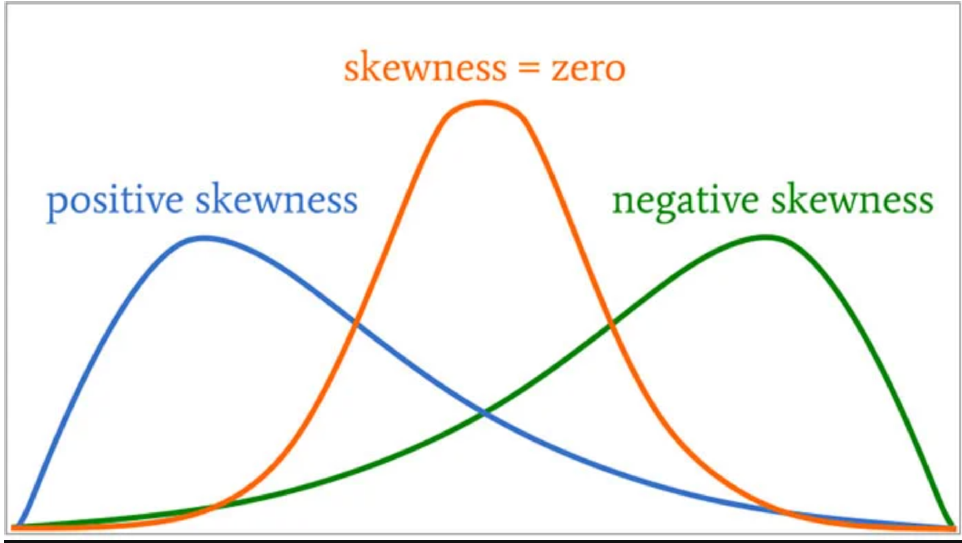

**Note:**

* Skewness is a way to describe the **shape of a data distribution** or the **pattern of how data points are spread out.**

* It can say weather the **data has outliers or not**

**Why Skewness matters:**

* Where the "typical" or "average" value is.
* Whether there are extreme values far from the average.
* Whether the data tends to be more on one side or the other.


In [ ]:
# Plots used to check the Skweness:
df.plot(kind ="density")
df.plot(kind ="kde")
sns.distplot(df, kde=True, hist=True)
sns.kdeplot(df)

'''
For distribution with no skewness(Normal), mean=median=mode
For a positively skewed distribution, mean>median>mode
For a negatively skewed distribution, mean<median<mode
'''

# Plot the PDF for all numerical variable in the data frame:
plt.rcParams["figure.figsize"] = [15,10]
df.plot(kind="density", subplots = True, layout = (3,3), sharex = False) # sharex - For individual columns the x axis has different scales.
plt.show()

# It computes skewness co-efficient for all the numeric columns:
df.skew()

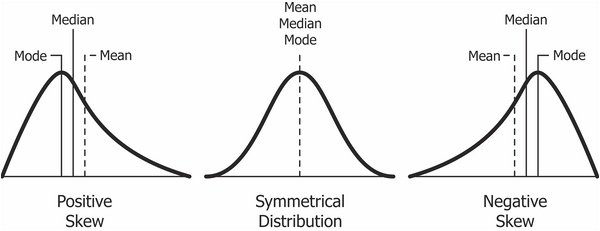

## <font color="orange">**9.2) Kurtosis**</font>



**Note:**
* Kurtosis is a measure of **how peaked or how heavily tailed** the data is.
* Kurtosis is a way of figuring out how **"pointy" or "flat"** a graph of data is **compared to a standard shape.**
* Peaked here means data is less spread out, and more **concentrated around the Mean.**

**Why Kurtosis Matters:**

Kurtosis helps us know if our data is **normal or not.** It helps in:
* **Detecting Outliers:**
Spotting data points that are very different from the rest.
* **Making Predictions:**
Understanding if your data follows a typical pattern.
* **Making Decisions:**
Knowing if extreme values should be given special attention in analysis.

So, kurtosis is like a tool that tells us if our data is **pointy (leptokurtic), normal (mesokurtic), or flat (platykurtic)**, giving us insights into the shapeand behavior of our data.

In [ ]:
# It computes kurtosis co-efficient for all the numeric columns:
df.kurt() # Range [-3, infinity)

Relation between Skweness and Kurtosis:

Skewness and kurtosis are **both measures describes the shape of a distribution, but they focus on different aspects:**

* **Skewness** focuses on the **symmetry** of the distribution, while **kurtosis** focuses on the **concentration of data in the tails.**
* Both measures provide valuable insights into the **characteristics of a dataset.**
* **Both are helpful** to see if data follows **Normal Distribution or NOT.**

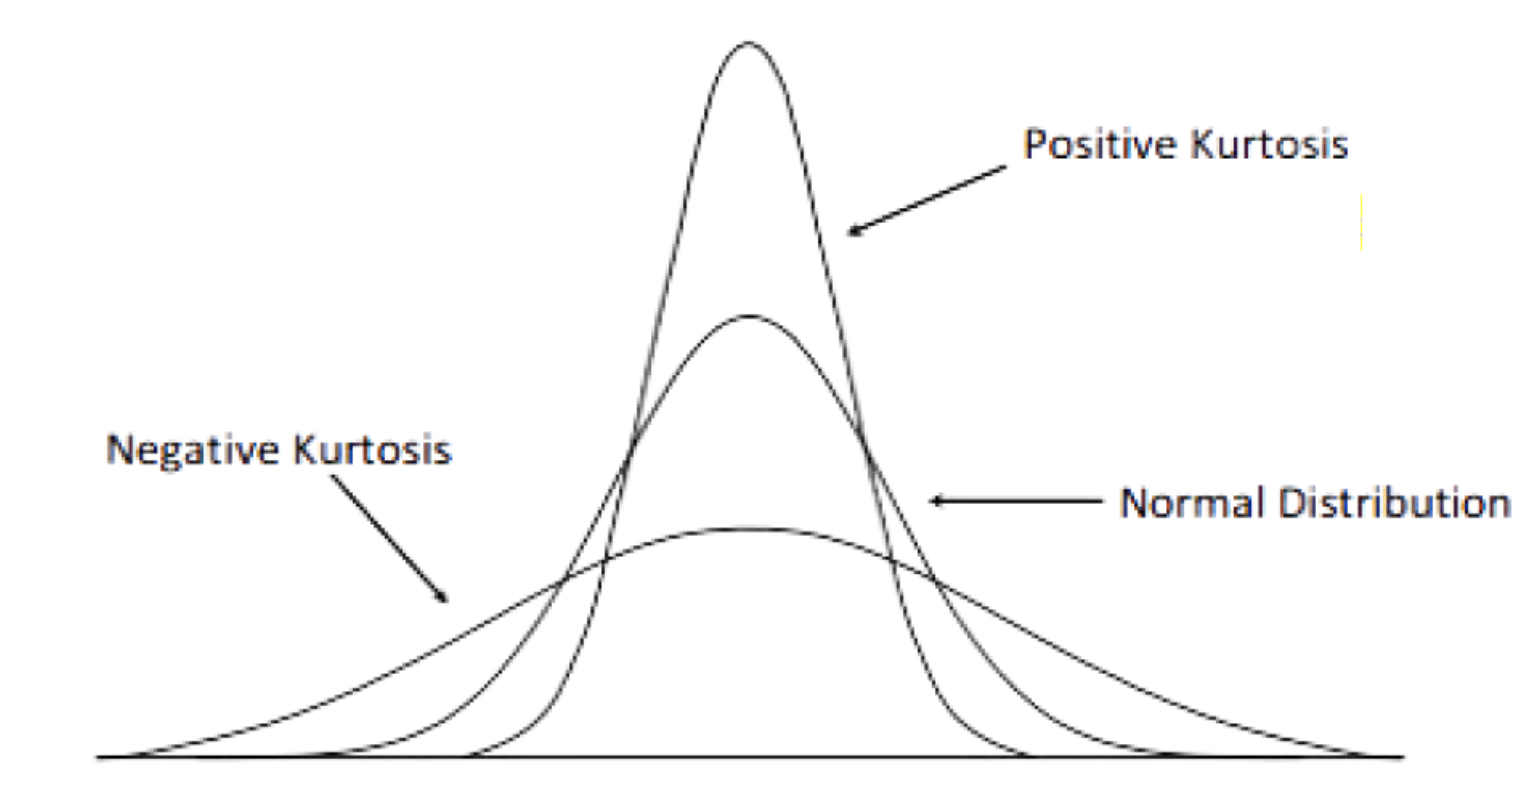

---


 # <font color="red">**10) FEATURE ENGINEERING - 2**</font>

## <font color="orange">**10.1) Missing Values**</font>

In [ ]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': data.isnull().sum(), 'Percentage': (data.isnull().sum() / len(data))*100})
missing_value.sort_values(by='Percentage', ascending=False)


# Impute Missing  values:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
from sklearn.impute import SimpleImputer
SimpleImputer(strategy='mean').fit_transform(a) # Mean
SimpleImputer(strategy='most_frequent').fit_transform(a) # Mode
SimpleImputer(strategy='constant', fill_value = 1000).fit_transform(a) # After having discussion with Business SME


# Dealing of Missing values numeric columns in the data frame:
# set of columns
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

# instance of simple imputer class with a median strategy
median_imputer = SimpleImputer(strategy = 'median')

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))


# Dealing of Missing values Categotical columns in the data frame:
# set of columns
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

## <font color="orange">**10.2) Outlier Treatment**</font>

**How to decide:**

* IQR --> Distribution - NOT NORMAL (or) Small Dataset.
* Z-Score --> Distribution - NORMAL (or) Large Dataset.

### 10.2.1) IQR - Interquartile range

* This method identifies outliers based on the quartiles of the data.
* It is more resistant to outliers than the mean-based methods like Z-score, making it better suited for skewed data like exam scores where a few high scores can significantly impact the mean.


In [ ]:
## Given data in df format:
df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6, 7, 8, 9, 100]})
# Calculate the IQR:
iqr = df.quantile(0.75) - df.quantile(0.25)
# Calculate the upper and lower bounds:
upper_bound = df.quantile(0.75) + 1.5 * iqr
lower_bound = df.quantile(0.25) - 1.5 * iqr
# For dataframe without outliers:
df_iqr = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


## Given dataset in list:
data12 = np.array([15, 18, 22, 23, 25, 28, 40, 75, 200])
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(data12, 25)
Q3 = np.percentile(data12, 75)
IQR = Q3 - Q1
# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# List comprehension:
outliers = [elem for elem in data12 if elem < lower_bound or elem > upper_bound]
outliers

### 10.2.1) Z-Score

*  Identify and remove data points with z-scores beyond a certain threshold (e.g., ±3).

* This method identifies outliers based on their standard deviation from the mean.
* However, it can be influenced by outliers itself, leading to inaccurate outlier detection when the data is skewed.
* In this scenario, the presence of a few high scores can inflate the standard deviation, potentially masking other outliers or misidentifying valid data points as outliers.

In [ ]:
import scipy
from scipy import stats

## Applying Z-Score for separate column:
# compute the z-scores using the method zscore from the scipy library
z_scores_LoanAmount = scipy.stats.zscore(df_num["LoanAmount"])
# Filter out the outlier values
# ~: Select all rows which do not satisfy the condition
df_LoanAmount_zscore = data["LoanAmount"][~((z_scores_LoanAmount < -3) | (z_scores_LoanAmount > 3))]

## Applying Z-Score for Entire df:
df_z_score = scipy.stats.zscore(df_num)
df_filtered = data[~((df_z_score < -3) | (df_z_score > 3)).any(axis=1)]

## <font color="orange">**10.3) Categorical Encoding**</font>

There are 3 ways:

* **One Hot Encoding**--> For 2 Categories
* **Lable Encoding** --> For 2 Categories. (Ordinal Data)
* **Target Encoding** ---> More than 2 Categories (Nominal Dat)

### 10.3.1) Lable Encoding

 It has only 2 categories we can use Lable Encoder here to convert loan status into numerical.

In [ ]:
from sklearn.preprocessing import LabelEncoder
col='Loan_Status'
label_encoder = LabelEncoder() # instance
df_iqr[col] = label_encoder.fit_transform(df_iqr[col])

If we have **more than 2 categories** and we can't represent them with labels 0, 1 and 2 it'll create an order within the categories  

Here we are going to use **Target Encoding**

### 10.3.2) Target Encoding

In [ ]:
pip install --upgrade category_encoders # Instal new library
from category_encoders import TargetEncoder

# Apply Target encoding:
col="Property_Area"
te = TargetEncoder() # instance

# here I need to pass 2 things as parameters. 1st the column that I'm working on
# 2nd the Target column

df_iqr[col] = te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])

## <font color='orange'>**10.4) Column Normalization and Standardization**</font>

Why do we need this?

* Bringing data into right scale, if scale is same for any two columns it will create biase.

**Types and when to use:**

* **Normalization (or) Min max scaler**
  * Distribution (NOT NORMAL)
  * Range (0,1)
* **Standardization**
 * Distribution (NORMAL)
  * Brings mean to 0 and std to 1

### 10.4.1) Normalization (or) Min max scaler

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
num['minmax_LoanAmount'] = min_max.fit_transform(num[['LoanAmount']])

### 10.4.1) Standardization


In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
num['Scaled_LoanAmount'] = standard_scale.fit_transform(num[['LoanAmount']])



---



---

